In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [4]:
dir_content = os.listdir()

In [5]:
dir_content = [filename for filename in dir_content if filename.find('cart-pole-v1') > -1]

In [6]:
dir_content

['1524748921-cart-pole-v1.csv']

In [7]:
df = pd.read_csv(dir_content[0])

In [8]:
df[df.rewards > 0.0]

,Unnamed: 0,actions-input,rewards
0,0,1,1.0
1,1,1,1.0
2,2,1,1.0
3,3,0,1.0
4,4,0,1.0
5,5,1,1.0
6,6,1,1.0
7,7,0,1.0
8,8,1,1.0
9,9,1,1.0


In [9]:
first_sequence = df['actions-input'][:316]

In [10]:
list_sequence = first_sequence.tolist()
treated_sequence = []
start = 0
incremental= 4
limit = 4
reversed_sequence = list_sequence[::-1]
#reversed_sequence[start:limit]
#reversed_sequence[limit+4:]
reversed_sequence_len = lambda: range(len(reversed_sequence))
for _ in reversed_sequence_len():
    done = not reversed_sequence[start:limit]
    if not done: treated_sequence.append(reversed_sequence[start:limit])
    reversed_sequence = reversed_sequence[limit+incremental:]
    start = start + incremental
    limit = limit + incremental
    if done: break
treated_sequence

[[1, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 1, 0],
 [0, 1, 1, 0],
 [1, 0, 1, 0],
 [1, 1, 1, 0],
 [1, 0, 1, 0],
 [1, 1, 0, 0]]

In [11]:
print('Produced length of output: {}'.format(len(treated_sequence)))

Produced length of output: 8


In [12]:
actions = np.array(treated_sequence)

In [13]:
actions

array([[1, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 0]])

In [14]:
second_sequence = df['rewards'][:316]

In [15]:
list_sequence = second_sequence.tolist()
treated_sequence = []
start = 0
incremental = 4
limit = 4
reversed_sequence = list_sequence[::-1]
reversed_sequence_len = lambda: range(len(reversed_sequence))
for _ in reversed_sequence_len():
    done = not reversed_sequence[start:limit]
    if not done: treated_sequence.append(reversed_sequence[start:limit])
    reversed_sequence = reversed_sequence[limit+incremental:]
    start = start + incremental
    limit = limit + incremental
    if done: break
treated_sequence

[[-10.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, -10.0, 1.0],
 [1.0, 1.0, 1.0, -10.0],
 [1.0, 1.0, 1.0, -10.0],
 [1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0]]

In [16]:
print('Produced length of output: {}'.format(len(treated_sequence)))

Produced length of output: 8


In [17]:
rewards = np.array(treated_sequence)

In [18]:
rewards

array([[-10.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.],
       [  1.,   1., -10.,   1.],
       [  1.,   1.,   1., -10.],
       [  1.,   1.,   1., -10.],
       [  1.,   1.,   1.,   1.],
       [  1.,   1.,   1.,   1.]])

In [19]:
import warnings; warnings.simplefilter('ignore')

In [20]:
from keras.models import Sequential

Using TensorFlow backend.


In [21]:
from keras.layers import Dense

In [22]:
from sklearn import model_selection

In [23]:
x, x_val, y, y_val = model_selection.train_test_split(rewards, actions, test_size=0.2, random_state=42)

In [24]:
model = Sequential()

In [25]:
model.add(Dense(4, input_shape=(4,)))

In [26]:
model.compile(optimizer='rmsprop', loss='mse')

In [27]:
model.fit(x, y, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 6 samples, validate on 2 samples
Epoch 1/10
6/6 [==============================] - 0s 18ms/step - loss: 12.5877 - val_loss: 23.3587
Epoch 2/10
6/6 [==============================] - 0s 407us/step - loss: 12.4379 - val_loss: 23.1735
Epoch 3/10
6/6 [==============================] - 0s 470us/step - loss: 12.3303 - val_loss: 23.0196
Epoch 4/10
6/6 [==============================] - 0s 557us/step - loss: 12.2409 - val_loss: 22.8838
Epoch 5/10
6/6 [==============================] - 0s 793us/step - loss: 12.1621 - val_loss: 22.7602
Epoch 6/10
6/6 [==============================] - 0s 435us/step - loss: 12.0903 - val_loss: 22.6451
Epoch 7/10
6/6 [==============================] - 0s 618us/step - loss: 12.0235 - val_loss: 22.5366
Epoch 8/10
6/6 [==============================] - 0s 1ms/step - loss: 11.9604 - val_loss: 22.4332
Epoch 9/10
6/6 [==============================] - 0s 952us/step - loss: 11.9004 - val_loss: 22.3339
Epoch 10/10
6/6 [==============================] - 0s 950us/s

In [28]:
score = model.evaluate(x, y)

6/6 [==============================] - 0s 221us/step


In [29]:
score

11.786948204040527

In [30]:
import seaborn as sns

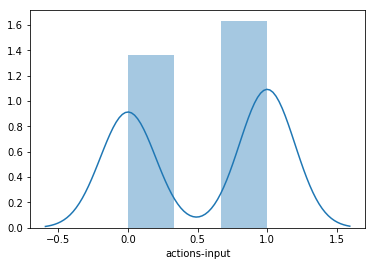

In [42]:
sns.distplot(df['actions-input'].head(n=100+1))

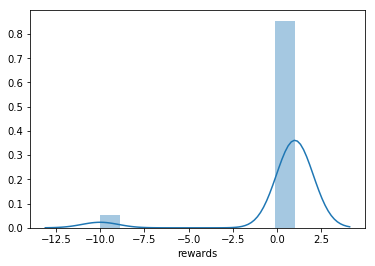

In [43]:
sns.distplot(df['rewards'].head(n=100+1))

In [31]:
#!python ../app.py --environment_name "Pong-v0" --output_stats_filename "pong-v0"